In [1]:
#%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from astropy.utils.data import get_pkg_data_filename
import warnings
from matplotlib import MatplotlibDeprecationWarning
warnings.filterwarnings("ignore", category=MatplotlibDeprecationWarning) 
from fermipy.gtanalysis import GTAnalysis
from astropy.io import fits
from astropy.wcs import WCS

In [2]:
c = np.load('Crab_5_bin_3/fit0.npy', allow_pickle=True).flat[0]

In [11]:
gta = GTAnalysis('new_data/config_5_3.yaml',logging={'verbosity': 3},fileio={'outdir': 'Crab_5_bin_3'})
gta.load_roi('fit0')

2022-02-13 10:18:55 INFO    GTAnalysis.__init__(): 
--------------------------------------------------------------------------------
fermipy version v1.0.1 
ScienceTools version 2.0.8
2022-02-13 10:18:55 INFO    GTAnalysis.load_roi(): Loading ROI file: /home/user/fermi/Crab_nebula/Crab_nebula_Analysis/Crab_5_bin_3/fit0.npy
2022-02-13 10:18:55 INFO    GTBinnedAnalysis._create_binned_analysis(): Creating BinnedAnalysis for component 00.
2022-02-13 10:19:03 INFO    GTAnalysis.load_roi(): Finished Loading ROI


In [12]:
gta.print_roi()

2022-02-13 10:19:12 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
4FGL J0534.5+2200   PointSource    PLSuperExpCuto    0.003 278222.32    449543.3
4FGL J0534.5+2201s  PointSource    PowerLaw          0.005   6881.04     77433.3
4FGL J0534.5+2201i  RadialGaussian LogParabola       0.006  10200.62     14457.3
4FGL J0526.3+2246   PointSource    PowerLaw          2.037     87.66      2369.2
4FGL J0544.4+2238   PointSource    PowerLaw          2.375    111.38      3964.0
isodiff             ConstantValue  FileFunction      -----   1273.54     42214.5
galdiff             MapCubeFunctio PowerLaw          -----  56874.68    173120.7



In [13]:
gta.print_params()

2022-02-13 10:19:13 INFO    GTAnalysis.print_params(): 
 idx parname                  value     error       min       max     scale free
--------------------------------------------------------------------------------
4FGL J0526.3+2246
   0 Prefactor                 1.58     0.207     1e-05     1e+03     1e-14    *
   1 Index                     2.62         0         0         5        -1     
   2 Scale                  4.4e+03         0   4.4e+03   4.4e+03         1     
4FGL J0534.5+2200
   3 Prefactor                 1.71   0.00996     1e-05     1e+03     1e-10    *
   4 Index1                    1.87         0         0         5        -1     
   5 Scale                 1.46e+03         0  1.46e+03  1.46e+03         1     
   6 Expfactor                0.483         0      -0.5       0.5      0.01     
   7 Index2                   0.667         0         0         2         1     
4FGL J0534.5+2201i
   8 norm                     0.466     0.011     1e-05     1e+03     1e-12    

4FGL J0526.3+2246

In [14]:
E = np.array(c['sources']['4FGL J0534.5+2200']['model_flux']['energies'])
dnde = np.array(c['sources']['4FGL J0534.5+2200']['model_flux']['dnde'])
print(len(dnde))
print(len(E))

50
50


In [46]:
E = np.array(c['sources']['4FGL J0526.3+2246']['model_flux']['energies'])

dnde_hi = np.array(c['sources']['4FGL J0526.3+2246']['model_flux']['dnde_hi'])
dnde_lo = np.array(c['sources']['4FGL J0526.3+2246']['model_flux']['dnde_lo'])
dnde = np.array(c['sources']['4FGL J0526.3+2246']['model_flux']['dnde'])

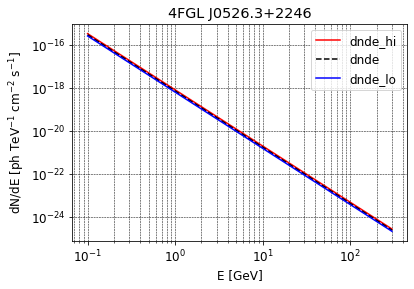

In [16]:

plt.loglog(E/1e3, dnde_hi*1e-6, 'r', label='dnde_hi')
plt.loglog(E/1e3, dnde*1e-6, 'k--',label ='dnde')
plt.loglog(E/1e3, dnde_lo*1e-6, 'blue',label ='dnde_lo')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [GeV]')
plt.ylabel(r'dN/dE [ph TeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0526.3+2246')
plt.legend(loc='upper right')
plt.show()
#plt.savefig("Crab_5/J0534.5+2200_spectrum.png")

In [17]:
sed2246 = gta.sed('4FGL J0526.3+2246')

2022-02-13 10:19:13 INFO    GTAnalysis.sed(): Computing SED for 4FGL J0526.3+2246
2022-02-13 10:19:23 INFO    GTAnalysis._make_sed(): Fitting SED
2022-02-13 10:19:23 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0534.5+2201i    : ['alpha', 'beta']
2022-02-13 10:19:28 INFO    GTAnalysis.sed(): Finished SED
2022-02-13 10:19:35 INFO    GTAnalysis.sed(): Execution time: 22.01 s


In [18]:
src = gta.roi['4FGL J0526.3+2246']

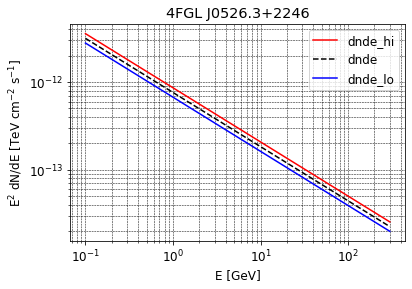

In [19]:

plt.loglog(E/1e3, (E**2)*dnde_hi*1e-6, 'r', label='dnde_hi')
plt.loglog(E/1e3, (E**2)*dnde*1e-6, 'k--',label ='dnde')
plt.loglog(E/1e3, (E**2)*dnde_lo*1e-6, 'blue',label ='dnde_lo')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^2$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0526.3+2246')
plt.legend(loc='upper right')
plt.show()
#plt.savefig("Crab_5/J0534.5+2200_spectrum.png")

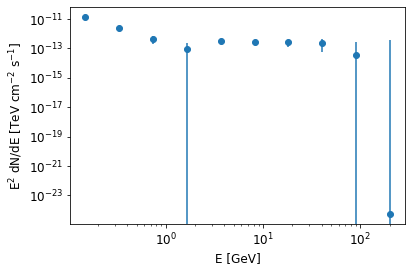

In [20]:
plt.errorbar(np.array(sed2246['e_ctr']*1e-3),
             sed2246['e2dnde']*1e-6, 
             yerr=sed2246['e2dnde_err']*1e-6, fmt ='o')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^{2}$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.show()

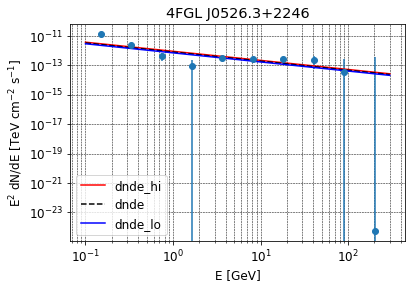

In [47]:
plt.loglog(E/1e3, (E**2)*dnde_hi*1e-6, 'r', label='dnde_hi')
plt.loglog(E/1e3, (E**2)*dnde*1e-6, 'k--',label ='dnde')
plt.loglog(E/1e3, (E**2)*dnde_lo*1e-6, 'blue',label ='dnde_lo')
plt.errorbar(np.array(sed2246['e_ctr']*1e-3),
             sed2246['e2dnde']*1e-6, 
             yerr=sed2246['e2dnde_err']*1e-6, fmt ='o')

plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^2$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0526.3+2246')
plt.legend(loc='lower left')
plt.show()

4FGL J0534.5+2200

In [48]:
E = np.array(c['sources']['4FGL J0534.5+2200']['model_flux']['energies'])

dnde_hi = np.array(c['sources']['4FGL J0534.5+2200']['model_flux']['dnde_hi'])
dnde_lo = np.array(c['sources']['4FGL J0534.5+2200']['model_flux']['dnde_lo'])
dnde = np.array(c['sources']['4FGL J0534.5+2200']['model_flux']['dnde'])


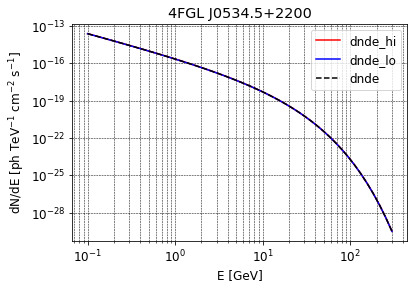

In [49]:

plt.loglog(E/1e3, dnde_hi*1e-6, 'r', label='dnde_hi')

plt.loglog(E/1e3, dnde_lo*1e-6, 'blue',label ='dnde_lo')
plt.loglog(E/1e3, dnde*1e-6, 'k--',label ='dnde')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [GeV]')
plt.ylabel(r'dN/dE [ph TeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2200')
plt.legend(loc='upper right')
plt.show()
#plt.savefig("Crab_5/J0534.5+2200_spectrum.png")

In [24]:
sed2200 = gta.sed('4FGL J0534.5+2200')

2022-02-13 10:19:38 INFO    GTAnalysis.sed(): Computing SED for 4FGL J0534.5+2200
2022-02-13 10:19:51 INFO    GTAnalysis._make_sed(): Fitting SED
2022-02-13 10:19:51 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0534.5+2201i    : ['alpha', 'beta']


Drm_Cache::update Measured counts < 0 4FGL J0534.5+2200 9 -6.4524e-12 2.29449e-13
1.30374e-05 1.45565e-05 1.01768e-05 5.0854e-06 1.78821e-06 4.27748e-07 6.7146e-08 5.02615e-09 1.05431e-10 2.29449e-13 


/home/user/miniconda3/envs/fermi/lib/python3.7/site-packages/scipy/interpolate/fitpack2.py:279: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
2022-02-13 10:19:55 INFO    GTAnalysis.sed(): Finished SED
2022-02-13 10:20:02 INFO    GTAnalysis.sed(): Execution time: 23.97 s


In [25]:
src2200 = gta.roi['4FGL J0534.5+2200']

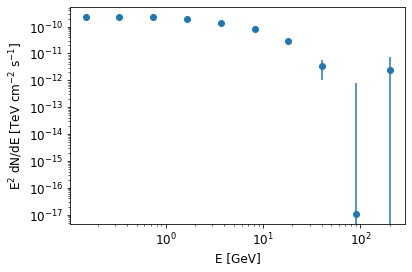

In [26]:
plt.errorbar(np.array(sed2200['e_ctr']*1e-3),
             sed2200['e2dnde']*1e-6, 
             yerr=sed2200['e2dnde_err']*1e-6, fmt ='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^{2}$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.show()

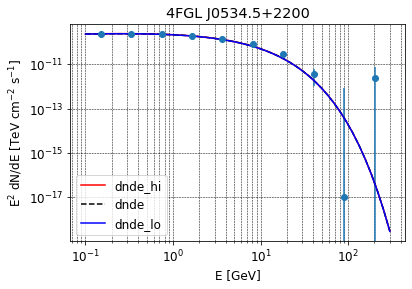

In [27]:
plt.loglog(E/1e3, (E**2)*dnde_hi*1e-6, 'r', label='dnde_hi')
plt.loglog(E/1e3, (E**2)*dnde*1e-6, 'k--',label ='dnde')
plt.loglog(E/1e3, (E**2)*dnde_lo*1e-6, 'blue',label ='dnde_lo')
plt.errorbar(np.array(sed2200['e_ctr']*1e-3),
             sed2200['e2dnde']*1e-6, 
             yerr=sed2200['e2dnde_err']*1e-6, fmt ='o')

plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^2$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2200')
plt.legend(loc='lower left')
plt.show()

4FGL J0534.5+2201i

In [28]:
E = np.array(c['sources']['4FGL J0534.5+2201i']['model_flux']['energies'])

dnde_hi = np.array(c['sources']['4FGL J0534.5+2201i']['model_flux']['dnde_hi'])
dnde_lo = np.array(c['sources']['4FGL J0534.5+2201i']['model_flux']['dnde_lo'])
dnde = np.array(c['sources']['4FGL J0534.5+2201i']['model_flux']['dnde'])


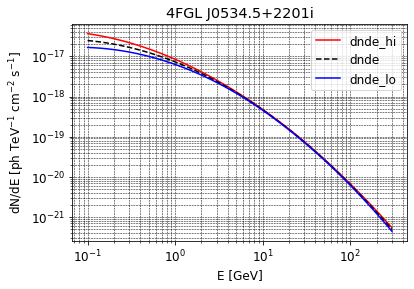

In [29]:

plt.loglog(E/1e3, dnde_hi*1e-6, 'r', label='dnde_hi')
plt.loglog(E/1e3, dnde*1e-6, 'k--',label ='dnde')
plt.loglog(E/1e3, dnde_lo*1e-6, 'blue',label ='dnde_lo')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [GeV]')
plt.ylabel(r'dN/dE [ph TeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2201i')
plt.legend(loc='upper right')
plt.show()
#plt.savefig("Crab_5/J0534.5+2200_spectrum.png")

In [30]:
sed2201i = gta.sed('4FGL J0534.5+2201i')

2022-02-13 10:20:04 INFO    GTAnalysis.sed(): Computing SED for 4FGL J0534.5+2201i
2022-02-13 10:20:13 INFO    GTAnalysis._make_sed(): Fitting SED
2022-02-13 10:20:13 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0534.5+2201i    : ['alpha', 'beta']
2022-02-13 10:20:18 INFO    GTAnalysis.sed(): Finished SED
2022-02-13 10:20:25 INFO    GTAnalysis.sed(): Execution time: 20.83 s


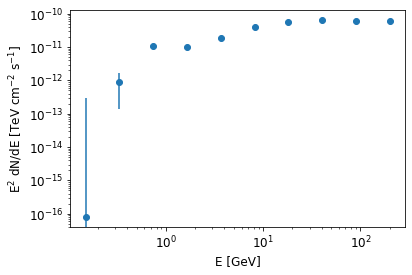

In [31]:
plt.errorbar(np.array(sed2201i['e_ctr']*1e-3),
             sed2201i['e2dnde']*1e-6, 
             yerr=sed2201i['e2dnde_err']*1e-6, fmt ='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^{2}$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.show()

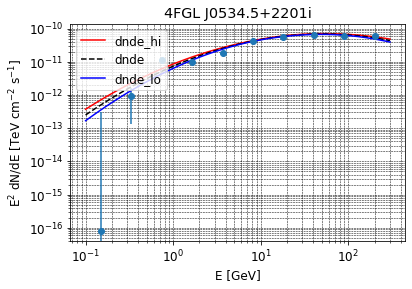

In [32]:
plt.loglog(E/1e3, (E**2)*dnde_hi*1e-6, 'r', label='dnde_hi')
plt.loglog(E/1e3, (E**2)*dnde*1e-6, 'k--',label ='dnde')
plt.loglog(E/1e3, (E**2)*dnde_lo*1e-6, 'blue',label ='dnde_lo')
plt.errorbar(np.array(sed2201i['e_ctr']*1e-3),
             sed2201i['e2dnde']*1e-6, 
             yerr=sed2201i['e2dnde_err']*1e-6, fmt ='o')

plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^2$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2201i')
plt.legend(loc='upper left')
plt.show()

4FGL J0534.5+2201s

In [33]:
E = np.array(c['sources']['4FGL J0534.5+2201s']['model_flux']['energies'])

dnde_hi = np.array(c['sources']['4FGL J0534.5+2201s']['model_flux']['dnde_hi'])
dnde_lo = np.array(c['sources']['4FGL J0534.5+2201s']['model_flux']['dnde_lo'])
dnde = np.array(c['sources']['4FGL J0534.5+2201s']['model_flux']['dnde'])


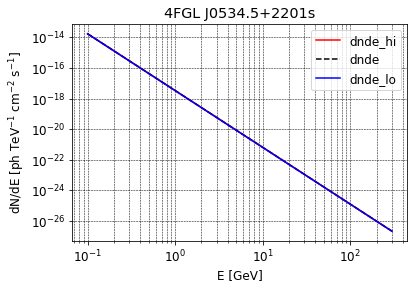

In [34]:

plt.loglog(E/1e3, dnde_hi*1e-6, 'r', label='dnde_hi')
plt.loglog(E/1e3, dnde*1e-6, 'k--',label ='dnde')
plt.loglog(E/1e3, dnde_lo*1e-6, 'blue',label ='dnde_lo')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [GeV]')
plt.ylabel(r'dN/dE [ph TeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2201s')
plt.legend(loc='upper right')
plt.show()
#plt.savefig("Crab_5/J0534.5+2200_spectrum.png")

In [35]:
sed2201s = gta.sed('4FGL J0534.5+2201s')

2022-02-13 10:20:27 INFO    GTAnalysis.sed(): Computing SED for 4FGL J0534.5+2201s
2022-02-13 10:20:32 INFO    GTAnalysis._make_sed(): Fitting SED
2022-02-13 10:20:32 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0534.5+2201i    : ['alpha', 'beta']
2022-02-13 10:20:36 INFO    GTAnalysis.sed(): Finished SED
2022-02-13 10:20:43 INFO    GTAnalysis.sed(): Execution time: 16.46 s


In [36]:
np.array(sed2201s['e_ctr']*1e-3)

array([1.49229609e-01, 3.32326520e-01, 7.40082270e-01, 1.64814342e+00,
       3.67032904e+00, 8.17363048e+00, 1.82022469e+01, 4.05359168e+01,
       9.02724023e+01, 2.01031911e+02])

In [37]:
sed2201s['e2dnde']*1e-6

array([9.00879013e-11, 2.21383685e-11, 8.87938833e-12, 5.09067020e-17,
       3.14486532e-17, 2.10255362e-12, 3.15252086e-12, 8.81807636e-13,
       1.57227302e-22, 5.27316687e-15])

In [38]:
sed2201s['e2dnde_err']*1e-6

array([8.96055603e-13, 7.66871274e-13, 8.15060887e-13, 1.28622642e-13,
       1.14116704e-13, 1.51064655e-12, 1.87577769e-12, 2.53741569e-12,
       1.35996629e-12, 4.93041547e-12])

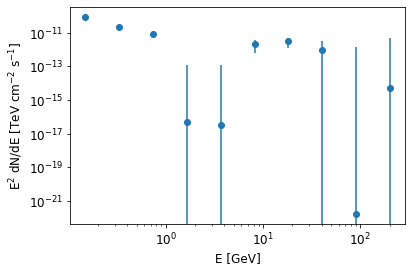

In [51]:
plt.errorbar(np.array(sed2201s['e_ctr']*1e-3),
             np.array(sed2201s['e2dnde']*1e-6), 
             yerr=np.array(sed2201s['e2dnde_err']*1e-6), fmt ='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^{2}$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.show()

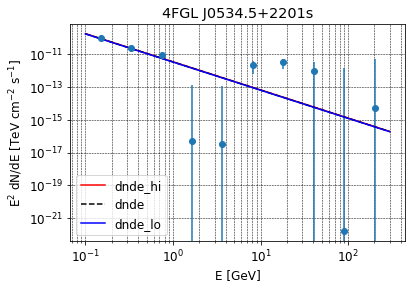

In [40]:
plt.loglog(E/1e3, (E**2)*dnde_hi*1e-6, 'r', label='dnde_hi')
plt.loglog(E/1e3, (E**2)*dnde*1e-6, 'k--',label ='dnde')
plt.loglog(E/1e3, (E**2)*dnde_lo*1e-6, 'blue',label ='dnde_lo')
plt.errorbar(np.array(sed2201s['e_ctr']*1e-3),
             sed2201s['e2dnde']*1e-6, 
             yerr=sed2201s['e2dnde_err']*1e-6, fmt ='o')

plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^2$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2201s')
plt.legend(loc='lower left')
plt.show()

4FGL J0544.4+2238

In [41]:
E = np.array(c['sources']['4FGL J0544.4+2238']['model_flux']['energies'])

dnde_hi = np.array(c['sources']['4FGL J0544.4+2238']['model_flux']['dnde_hi'])
dnde_lo = np.array(c['sources']['4FGL J0544.4+2238']['model_flux']['dnde_lo'])
dnde = np.array(c['sources']['4FGL J0544.4+2238']['model_flux']['dnde'])


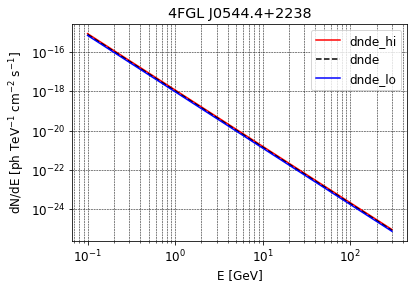

In [42]:

plt.loglog(E/1e3, dnde_hi*1e-6, 'r', label='dnde_hi')
plt.loglog(E/1e3, dnde*1e-6, 'k--',label ='dnde')
plt.loglog(E/1e3, dnde_lo*1e-6, 'blue',label ='dnde_lo')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [GeV]')
plt.ylabel(r'dN/dE [ph TeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0544.4+2238')
plt.legend(loc='upper right')
plt.show()
#plt.savefig("Crab_5/J0534.5+2200_spectrum.png")

In [43]:
sed2238 = gta.sed('4FGL J0544.4+2238')

2022-02-13 10:20:45 INFO    GTAnalysis.sed(): Computing SED for 4FGL J0544.4+2238
2022-02-13 10:20:59 INFO    GTAnalysis._make_sed(): Fitting SED
2022-02-13 10:20:59 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0534.5+2201i    : ['alpha', 'beta']
2022-02-13 10:21:04 INFO    GTAnalysis.sed(): Finished SED
2022-02-13 10:21:12 INFO    GTAnalysis.sed(): Execution time: 27.07 s


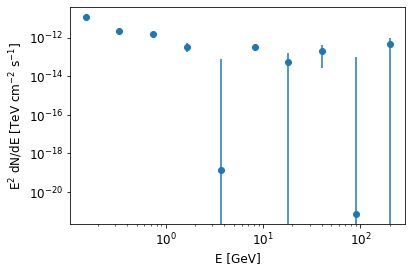

In [44]:
plt.errorbar(np.array(sed2238['e_ctr']*1e-3),
             sed2238['e2dnde']*1e-6, 
             yerr=sed2238['e2dnde_err']*1e-6, fmt ='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^{2}$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.show()

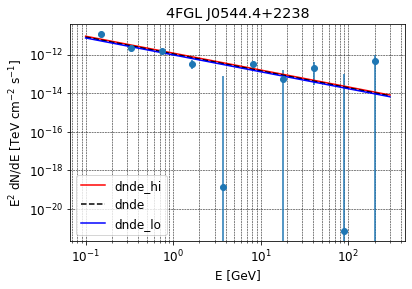

In [45]:
plt.loglog(E/1e3, (E**2)*dnde_hi*1e-6, 'r', label='dnde_hi')
plt.loglog(E/1e3, (E**2)*dnde*1e-6, 'k--',label ='dnde')
plt.loglog(E/1e3, (E**2)*dnde_lo*1e-6, 'blue',label ='dnde_lo')
plt.errorbar(np.array(sed2238['e_ctr']*1e-3),
             sed2238['e2dnde']*1e-6, 
             yerr=sed2238['e2dnde_err']*1e-6, fmt ='o')

plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^2$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0544.4+2238')
plt.legend(loc='lower left')
plt.show()